<a href="https://colab.research.google.com/github/SagarSitaula1/Data-Visual/blob/main/Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#America's favorite TV Programs(2016)

#Project: Recreating the Master

#Sagar Sitaula

#Spring 2022

#CPMSA 4213

#Instructor : Dr. Nicholas Jacob


>**Abstract:**  In this project, I used my deep understanding of graphical brilliance to clean the data and recreate the graph using various libraries. After the code, I'll explain everything I'll be doing. The goal is to find the correct graph and data to go with it.




**Introduction**

For recreating the master I choose America's Favourite TV programs.In this part of the project I have mainly focused on the top ten tv program in 2016. I have watched most of the shows listed here, this should be an interesting topic to recreate for me.




**Visualization and its Source**

Listed below is the visualization I am going to work on while to recreate.I choose Statista as the source of the dataset because I believe it is a great source of visualization and meet the requirement of graphical excellence.

I think this graph is excellent because It gives the name of the series and the channel it is air in. It also provides the number of viewer that watched the series.

link to the site -https://www.statista.com/chart/7308/top-10-primetime-tv-programs/

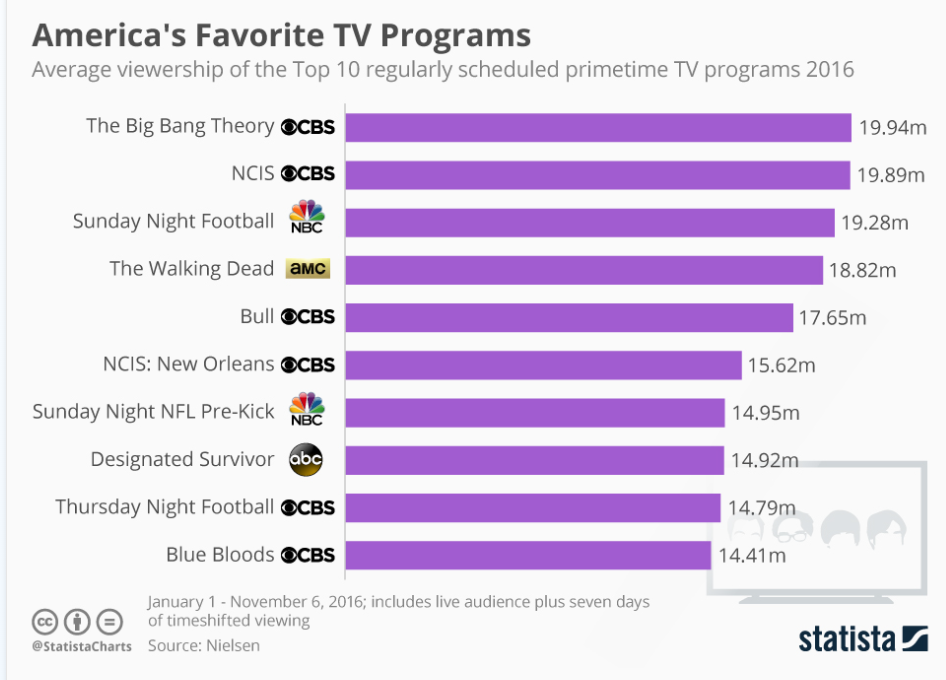

# LIBRARIES USED

In [17]:
import numpy as np #a matrix like package for handling data
import pandas as pa #a R like package for handling data
from scipy import stats #a way to just get a piece of a large package
import matplotlib.pyplot as plt #a way to generate plots, histograms, bar charts, and other types of charts 
import seaborn as sns #it is based on matplotlib
import requests #HTTP library
import pandas as pd # used to manipulate data and analyze it
from bs4 import BeautifulSoup #Used for a web scraping purposes to pull the data out of HTML and XML files
import re #Used for regular expression in Python.

#PANDAS AS DATAFRAME

In [18]:
r = requests.get('https://www.nielsen.com/us/en/insights/article/2016/tops-of-2016-tv/')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
len(html_soup.find_all('table'))

5

In [19]:
tables = html_soup.find_all('table')

df = pa.read_html(str(tables))[1]
df

,Rank,Program,Originator,Persons 2+ Rating,Average No. of Viewers
0,1,"BIG BANG THEORY, THE",CBS,6.7,19938000.0
1,2,NCIS,CBS,6.7,19885000.0
2,3,NBC SUNDAY NIGHT FOOTBALL,NBC,6.4,19283000.0
3,4,WALKING DEAD,AMC,6.3,18824000.0
4,5,BULL,CBS,5.8,17645000.0
5,6,NCIS: NEW ORLEANS,CBS,5.2,15618000.0
6,7,SUNDAY NIGHT NFL PRE-KICK,NBC,5.0,14952000.0
7,8,DESIGNATED SURVIVOR,ABC,4.9,14915000.0
8,9,CBS+NFLN THU NT FOOTBALL,CBS,4.9,14785000.0
9,10,BLUE BLOODS,CBS,4.8,14414000.0


It is not a big data set but a perfect for me to recreate the above visualization.  

**Table Information**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    11 non-null     object 
 1   Program                 10 non-null     object 
 2   Originator              10 non-null     object 
 3   Persons 2+ Rating       10 non-null     float64
 4   Average No. of Viewers  10 non-null     float64
dtypes: float64(2), object(3)
memory usage: 568.0+ bytes


The command df.info() helps me find dtype. There are three object and two float. 

In [21]:
df.isnull()

,Rank,Program,Originator,Persons 2+ Rating,Average No. of Viewers
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


It's critical for me to know what kind of data I'm dealing with. You saw me use info() in my previous command, and here in this table, I've used df.isnull() to see if I have any null values, otherwise I'd have to put them in my cleaning list. There is one True value returned, as you can see, but it is not data that I will need to clear. As a result, I'll continue with my column cleaning.

I think most of my data looks clean the only thing I am going to perform is to give a smaller names to average no of viewers and 2+ rating.

In [22]:
df.columns

Index(['Rank', 'Program', 'Originator', 'Persons 2+ Rating',
       'Average No. of Viewers'],
      dtype='object')

Rather than going back and looking at the names of my table columns, I'm using df.columns to get a list of all the columns in my data. We can always go back and look up the names of the columns. df.columns, on the other hand, simply saves us time and makes our job easier.

In [23]:
df_sorted= df.sort_values('Average No. of Viewers')
df_sorted= df.sort_values('Persons 2+ Rating')

In [24]:
df1=df.rename(columns={'Average No. of Viewers': 'Viewers'}, inplace=True)
df1=df.rename(columns={'Persons 2+ Rating': 'Rating'}, inplace=True)
df.columns

Index(['Rank', 'Program', 'Originator', 'Rating', 'Viewers'], dtype='object')

In [25]:
df_sorted= df.sort_values('Viewers')
df_sorted= df.sort_values('Rating')

Here, I changed the long name to one word short version, as you can see on the graph below.

In [26]:
df_sorted

,Rank,Program,Originator,Rating,Viewers
9,10,BLUE BLOODS,CBS,4.8,14414000.0
7,8,DESIGNATED SURVIVOR,ABC,4.9,14915000.0
8,9,CBS+NFLN THU NT FOOTBALL,CBS,4.9,14785000.0
6,7,SUNDAY NIGHT NFL PRE-KICK,NBC,5.0,14952000.0
5,6,NCIS: NEW ORLEANS,CBS,5.2,15618000.0
4,5,BULL,CBS,5.8,17645000.0
3,4,WALKING DEAD,AMC,6.3,18824000.0
2,3,NBC SUNDAY NIGHT FOOTBALL,NBC,6.4,19283000.0
0,1,"BIG BANG THEORY, THE",CBS,6.7,19938000.0
1,2,NCIS,CBS,6.7,19885000.0


**Data Is Ready For Visualization**

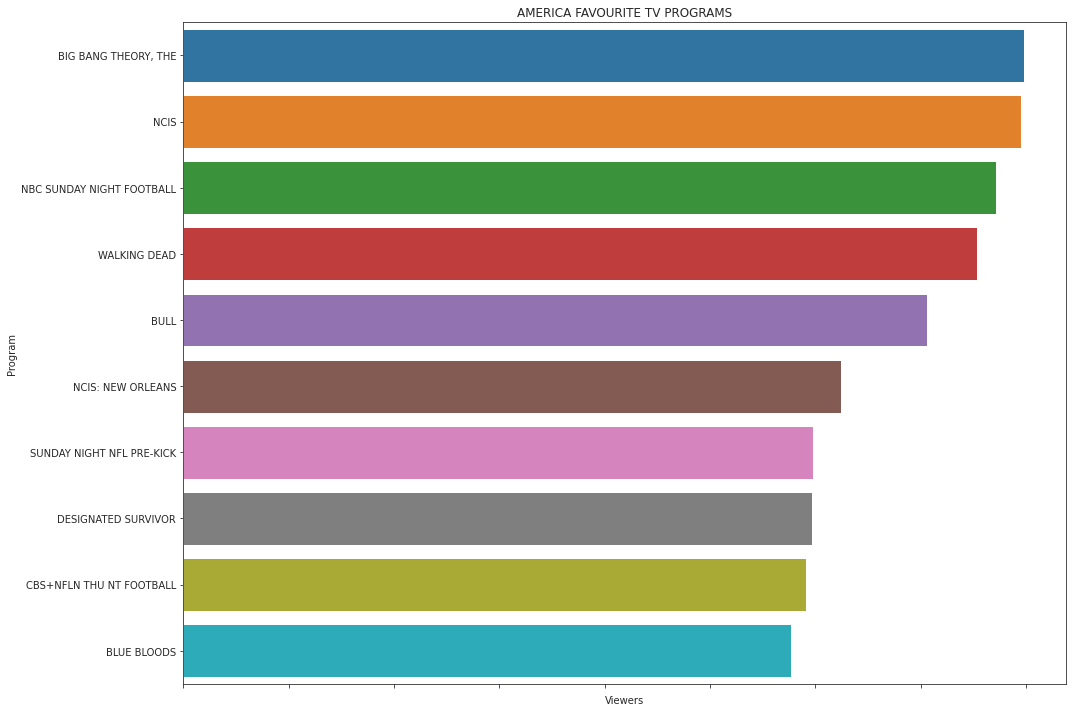

In [27]:
ax = sns.barplot(data = df, x='Viewers', y="Program",)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_title('AMERICA FAVOURITE TV PROGRAMS')
plt.show()


It looks like a right size to me but not the color. I think I will keep this color as all the color on the master are purple but I wanted my graph to be multiple color, which is why I will not be changing the color and leave as it is.

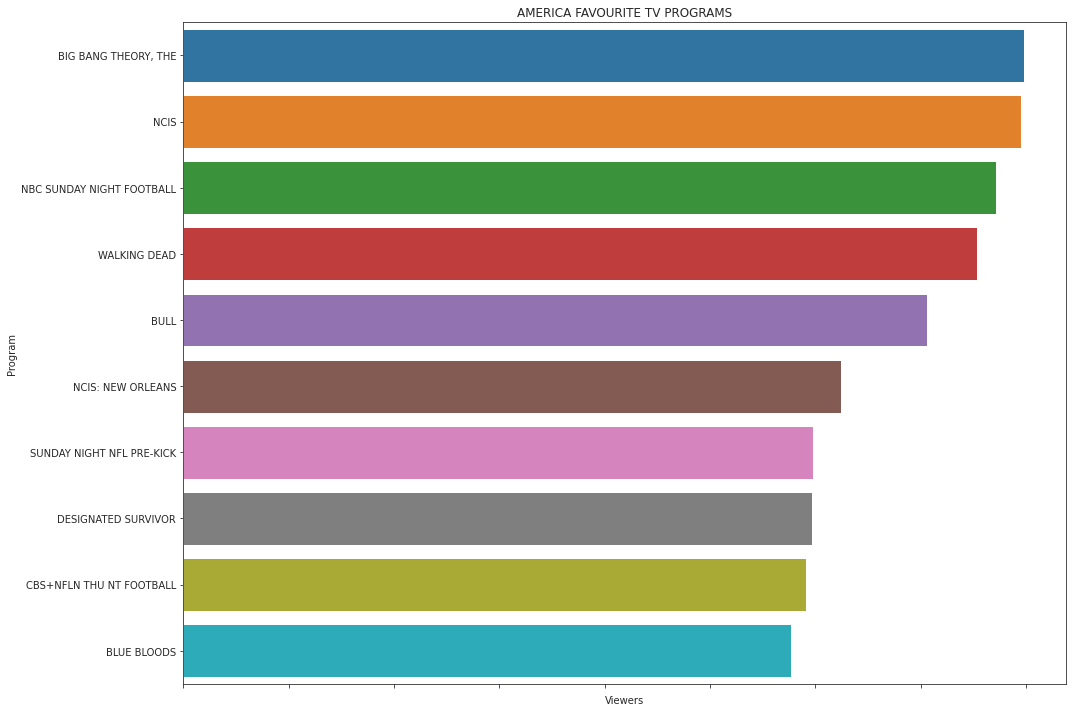

<Figure size 2880x1440 with 0 Axes>

In [44]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
sns.set_style('ticks')
ax = sns.barplot(data = df, x='Viewers', y="Program",)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_title('AMERICA FAVOURITE TV PROGRAMS')
plt.figure(figsize=(40,20))
plt.show()



**One Annotation**

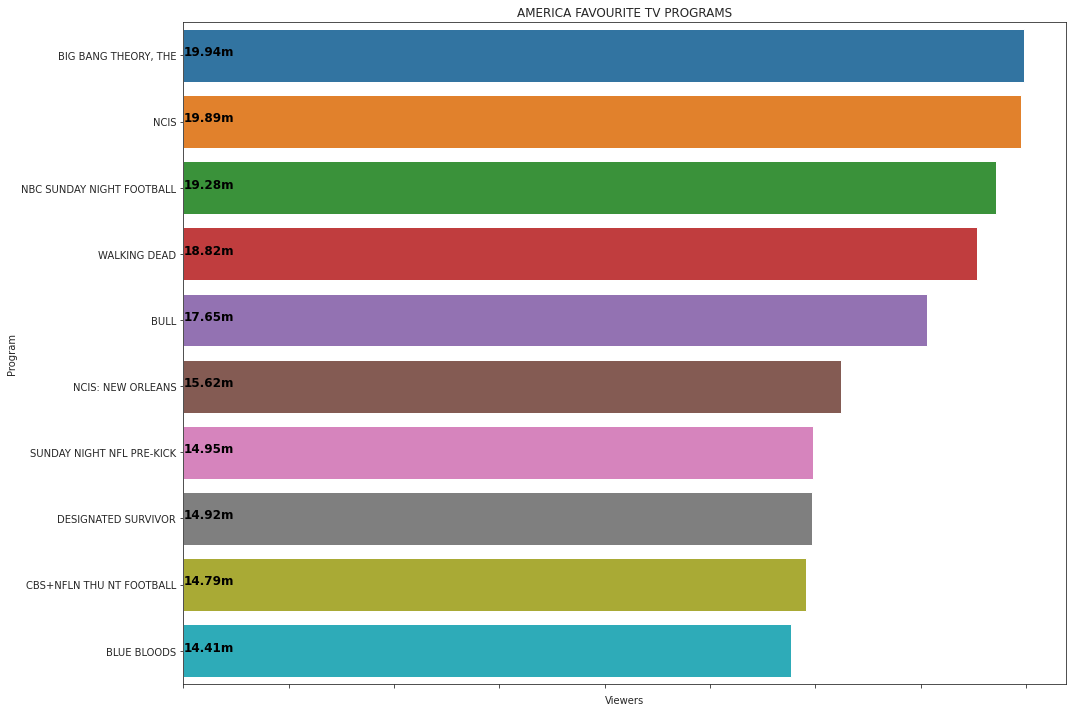

In [45]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
sns.set_style('ticks')
ax = sns.barplot(data = df, x='Viewers', y="Program",)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_title('AMERICA FAVOURITE TV PROGRAMS')

plt.text(30, 0,"19.94m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 1,"19.89m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 2,"19.28m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 3,"18.82m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 4,"17.65m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 5,"15.62m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 6,"14.95m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 7,"14.92m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 8,"14.79m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 9,"14.41m",horizontalalignment='left', size='large', color='black', weight='semibold')



plt.show()


Here, I have increased the size of the chart and tried to annotate the number of viewers on the graph. But I am not been able to figure out how to shift the numbers to the right. No matter what value I enter on the x-axis it doesnot shifts.

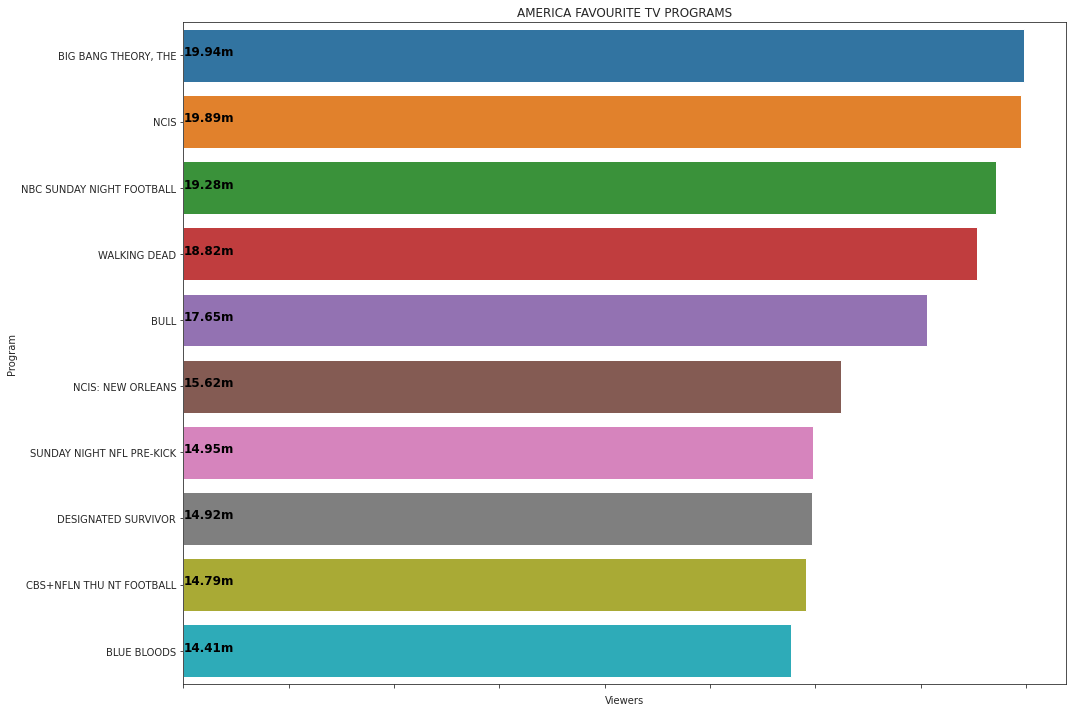

In [43]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
sns.set_style('ticks')
ax = sns.barplot(data = df, x='Viewers', y="Program",)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_title('AMERICA FAVOURITE TV PROGRAMS')

plt.text(37, 0,"19.94m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 1,"19.89m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 2,"19.28m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 3,"18.82m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 4,"17.65m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 5,"15.62m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 6,"14.95m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 7,"14.92m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 8,"14.79m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 9,"14.41m",horizontalalignment='left', size='large', color='black', weight='semibold')


plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


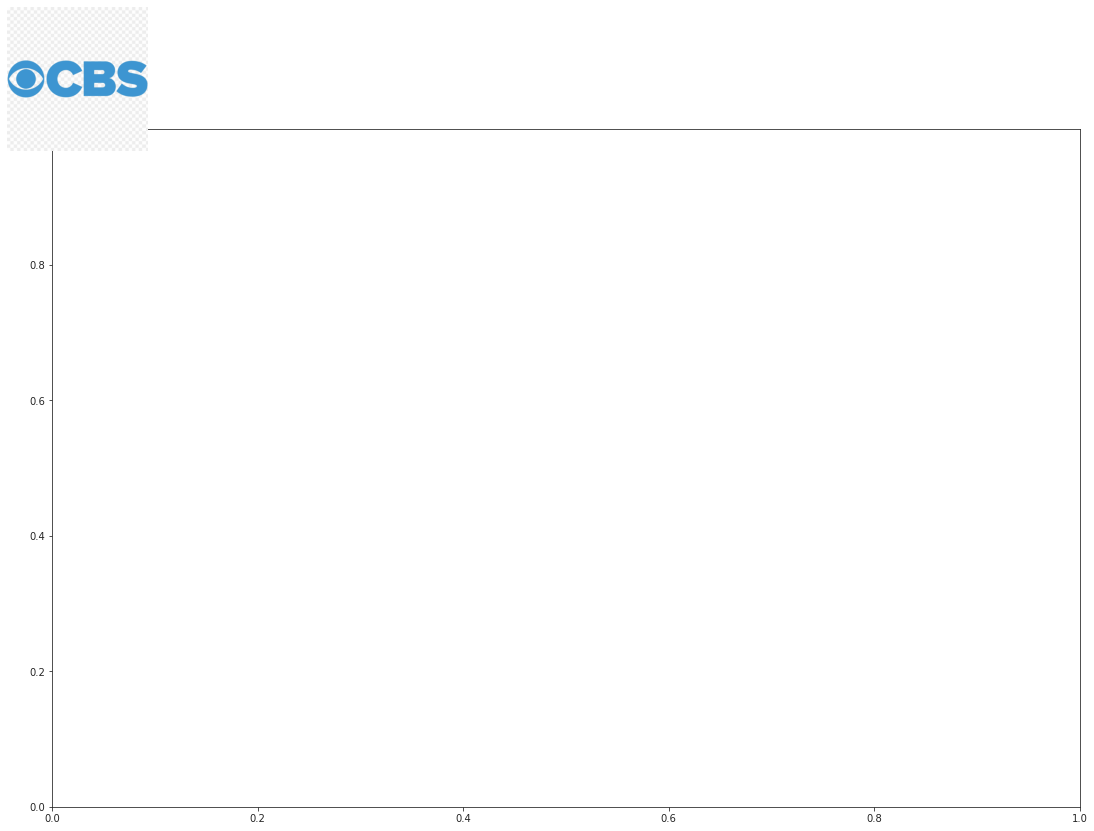

In [31]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
arr_lena = plt.imread('/cbs logo.png')
newax = fig.add_axes([-0.08,0.95,0.2,0.2], anchor='NE', zorder=1)
newax.imshow(arr_lena)
newax.axis('off')
plt.draw()
plt.show()

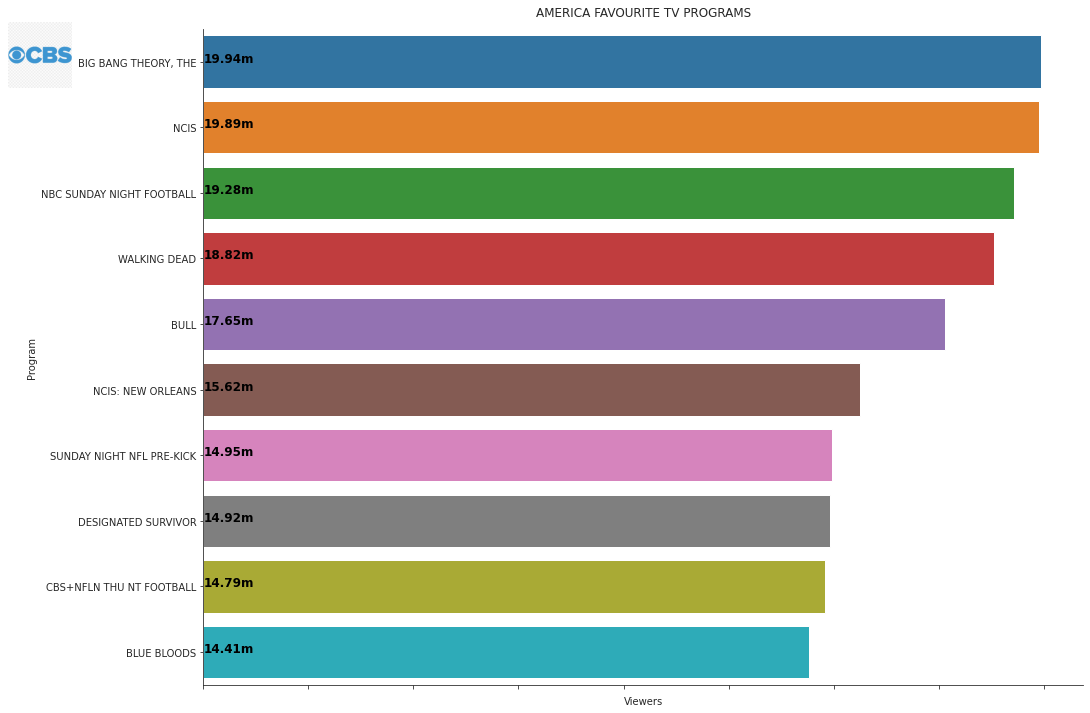

In [32]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
sns.set_style('ticks')
ax = sns.barplot(data = df, x='Viewers', y="Program",)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_title('AMERICA FAVOURITE TV PROGRAMS')

plt.text(30, 0,"19.94m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 1,"19.89m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 2,"19.28m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 3,"18.82m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 4,"17.65m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 5,"15.62m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 6,"14.95m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 7,"14.92m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 8,"14.79m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 9,"14.41m",horizontalalignment='left', size='large', color='black', weight='semibold')

arr_lena = plt.imread('/cbs logo.png')
axin = ax.inset_axes([-0.32,0.91,0.1699,0.1], anchor='NE', zorder=1)    
axin.imshow(arr_lena)
axin.axis('off')
sns.despine()


plt.show()

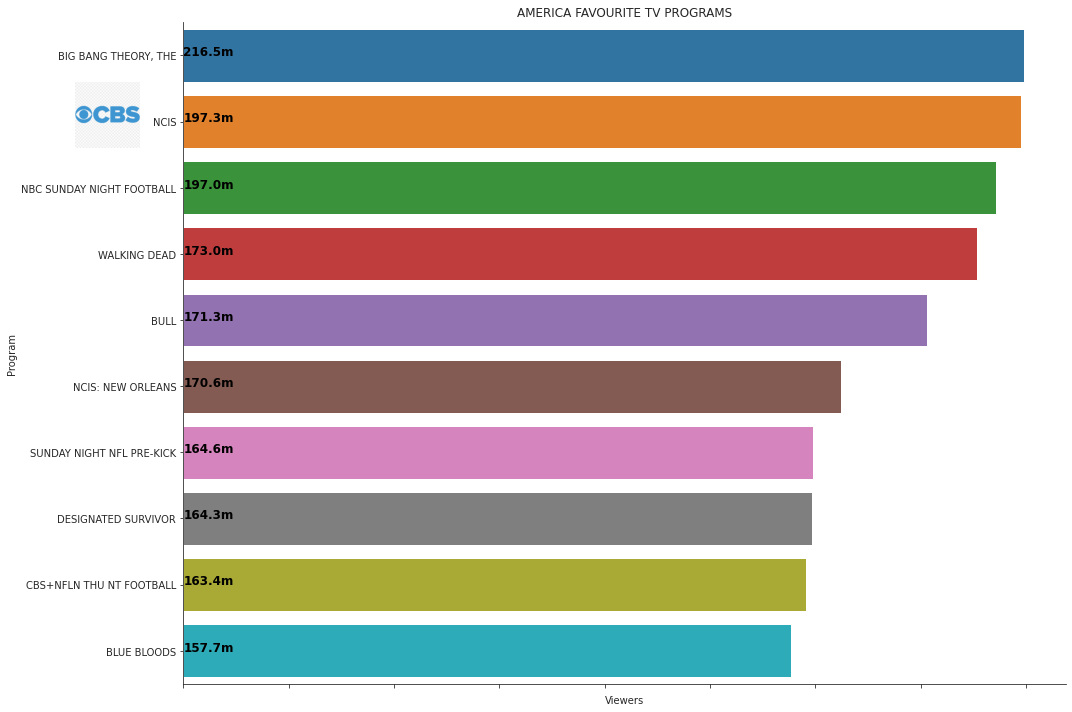

In [42]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
sns.set_style('ticks')
ax = sns.barplot(data = df, x='Viewers', y="Program",)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_title('AMERICA FAVOURITE TV PROGRAMS')

plt.text(200, 0,"19.94m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 1,"19.89m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 2,"19.28m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 3,"18.82m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 4,"17.65m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 5,"15.62m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 6,"14.95m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 7,"14.92m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 8,"14.79m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 9,"14.41m",horizontalalignment='left', size='large', color='black', weight='semibold')

arr_lena = plt.imread('/cbs logo.png')
axin = ax.inset_axes([-0.22,0.81,0.1699,0.1], anchor='NE', zorder=1)    
axin.imshow(arr_lena)
axin.axis('off')
sns.despine()


plt.show()

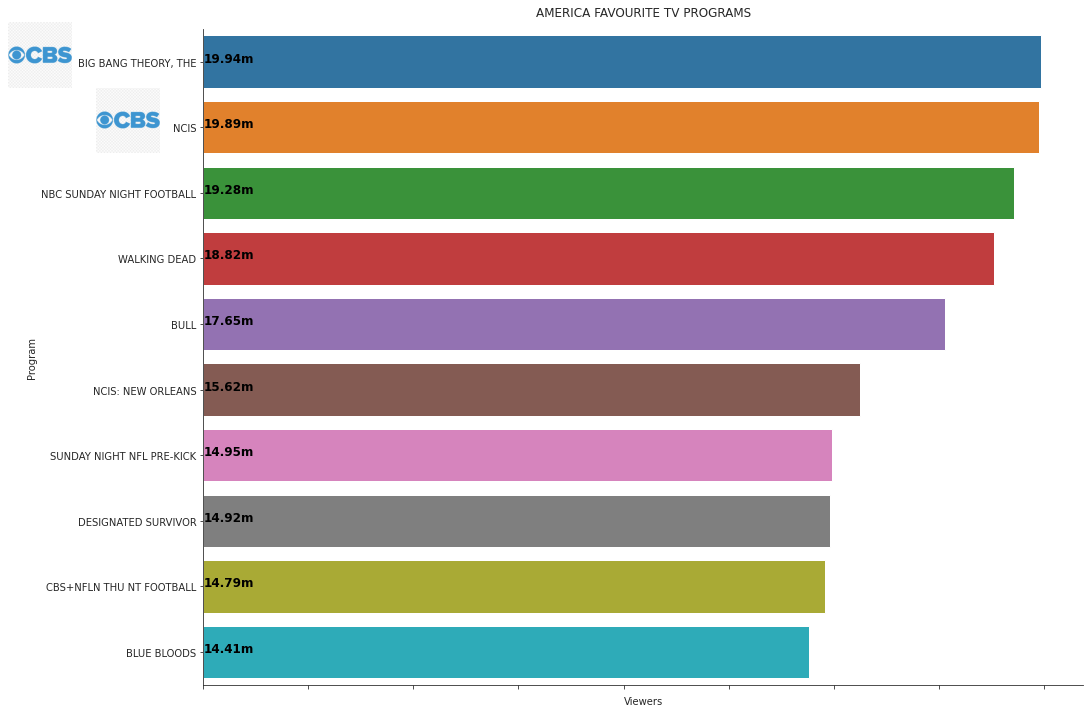

In [34]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
sns.set_style('ticks')
ax = sns.barplot(data = df, x='Viewers', y="Program",)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_title('AMERICA FAVOURITE TV PROGRAMS')

plt.text(30, 0,"19.94m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 1,"19.89m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 2,"19.28m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 3,"18.82m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 4,"17.65m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 5,"15.62m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 6,"14.95m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 7,"14.92m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 8,"14.79m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 9,"14.41m",horizontalalignment='left', size='large', color='black', weight='semibold')

arr_lena = plt.imread('/cbs logo.png')
axin = ax.inset_axes([-0.32,0.91,0.1699,0.1], anchor='NE', zorder=1)    
axin.imshow(arr_lena)
axin.axis('off')
sns.despine()

arr_lena = plt.imread('/cbs logo.png')
axin = ax.inset_axes([-0.22,0.81,0.1699,0.1], anchor='NE', zorder=1)    
axin.imshow(arr_lena)
axin.axis('off')
sns.despine()


plt.show()

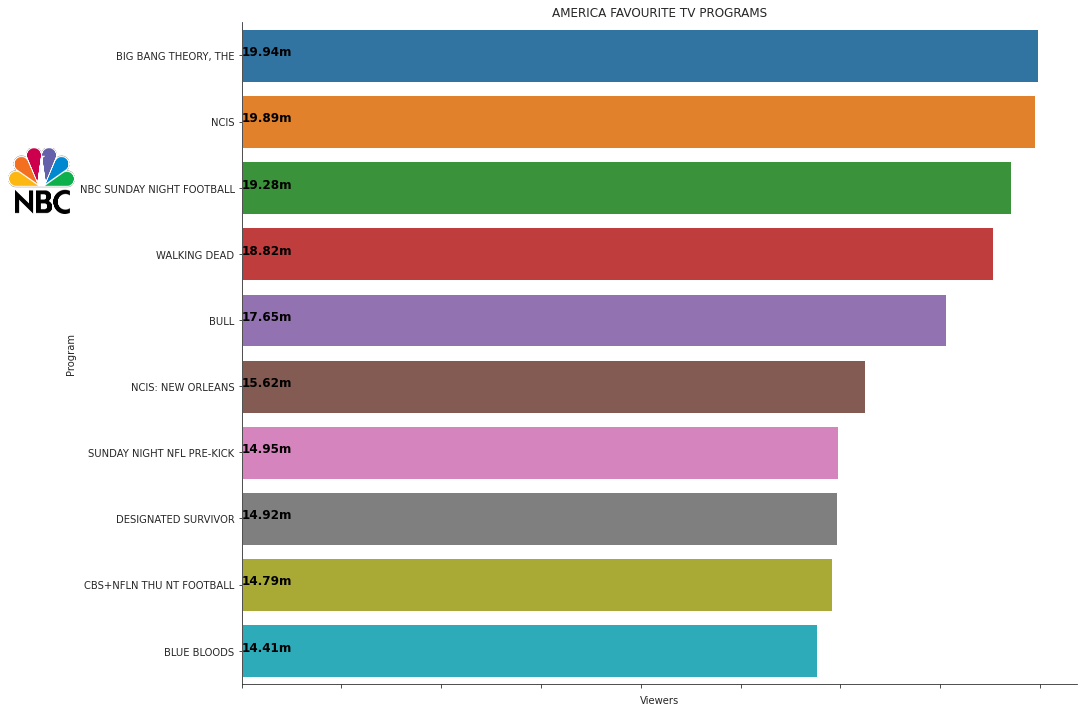

In [35]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
sns.set_style('ticks')
ax = sns.barplot(data = df, x='Viewers', y="Program",)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_title('AMERICA FAVOURITE TV PROGRAMS')

plt.text(30, 0,"19.94m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 1,"19.89m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 2,"19.28m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 3,"18.82m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 4,"17.65m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 5,"15.62m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 6,"14.95m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 7,"14.92m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 8,"14.79m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 9,"14.41m",horizontalalignment='left', size='large', color='black', weight='semibold')

arr_lena = plt.imread('/NBC_logo.svg.png')
axin = ax.inset_axes([-0.37,0.71,0.1699,0.1], anchor='NE', zorder=1)    
axin.imshow(arr_lena)
axin.axis('off')
sns.despine()


plt.show()

FileNotFoundError: ignored

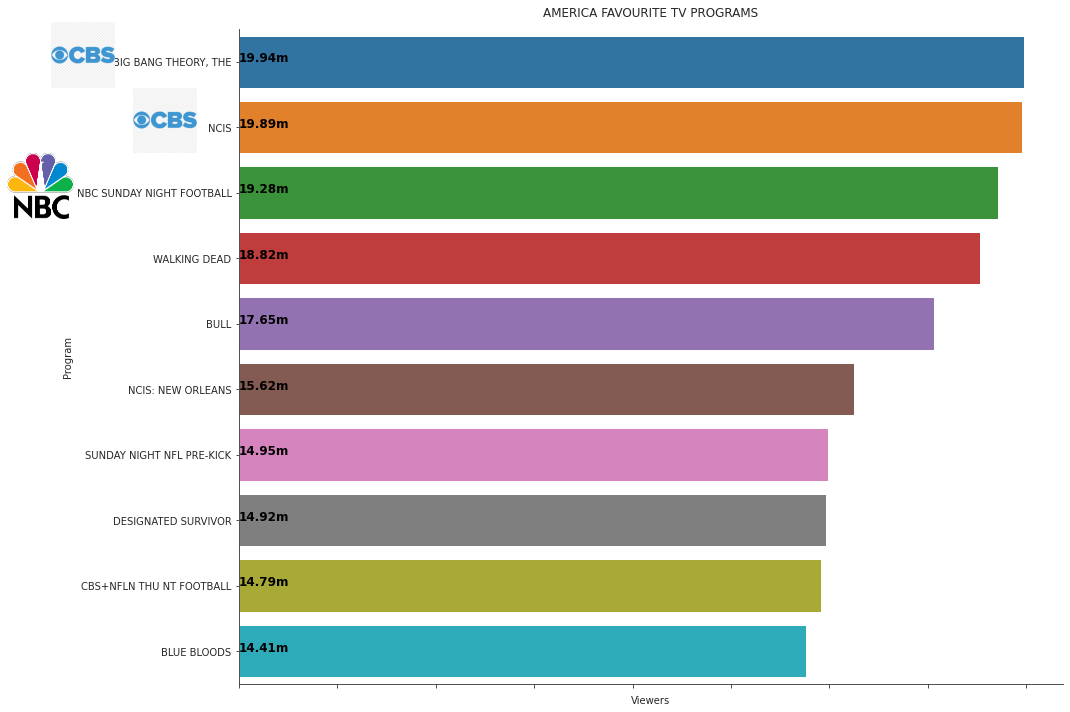

In [37]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
sns.set_style('ticks')
ax = sns.barplot(data = df, x='Viewers', y="Program",)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_title('AMERICA FAVOURITE TV PROGRAMS')

plt.text(30, 0,"19.94m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 1,"19.89m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 2,"19.28m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 3,"18.82m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 4,"17.65m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 5,"15.62m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 6,"14.95m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 7,"14.92m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 8,"14.79m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 9,"14.41m",horizontalalignment='left', size='large', color='black', weight='semibold')

arr_lena = plt.imread('/cbs logo.png')
axin = ax.inset_axes([-0.32,0.91,0.1699,0.1], anchor='NE', zorder=1)    
axin.imshow(arr_lena)
axin.axis('off')
sns.despine()

arr_lena = plt.imread('/cbs logo.png')
axin = ax.inset_axes([-0.22,0.81,0.1699,0.1], anchor='NE', zorder=1)    
axin.imshow(arr_lena)
axin.axis('off')
sns.despine()

arr_lena = plt.imread('/NBC_logo.svg.png')
axin = ax.inset_axes([-0.37,0.71,0.1699,0.1], anchor='NE', zorder=1)    
axin.imshow(arr_lena)
axin.axis('off')
sns.despine()

arr_lena = plt.imread('/cbs logo.svg.png')
axin = ax.inset_axes([-0.37,0.51,0.1699,0.1], anchor='NE', zorder=1)    
axin.imshow(arr_lena)
axin.axis('off')
sns.despine()



plt.show()

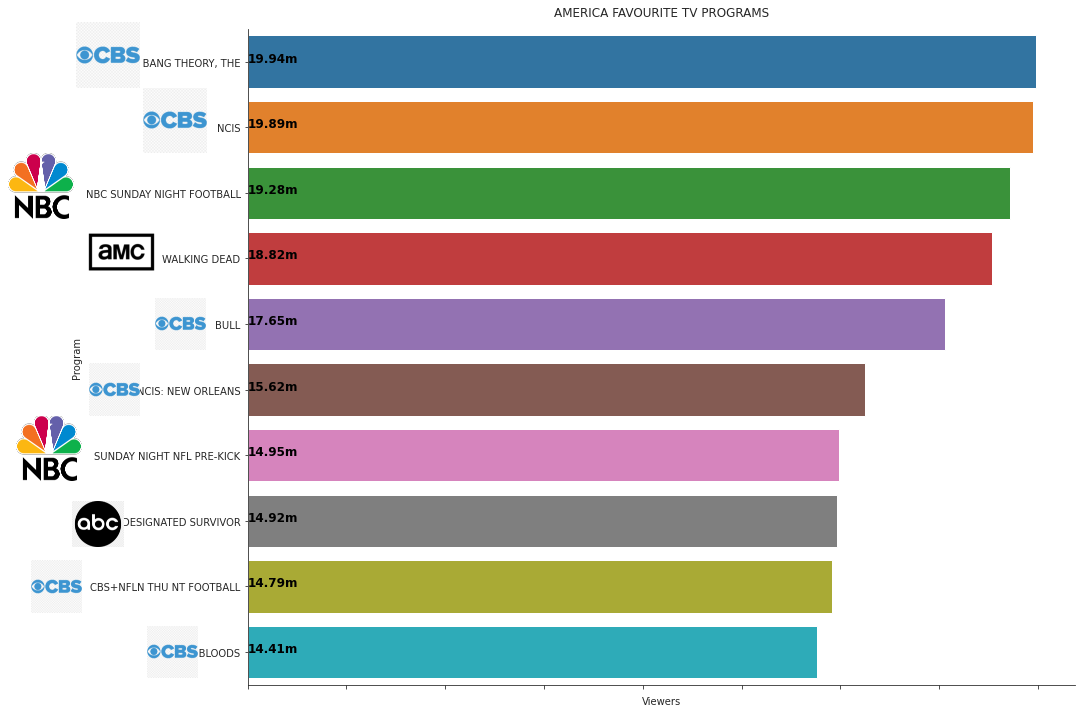

In [46]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
sns.set_style('ticks')
ax = sns.barplot(data = df, x='Viewers', y="Program",)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_title('AMERICA FAVOURITE TV PROGRAMS')

plt.text(30, 0,"19.94m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(130, 1,"19.89m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(130, 2,"19.28m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 3,"18.82m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 4,"17.65m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 5,"15.62m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 6,"14.95m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 7,"14.92m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 8,"14.79m",horizontalalignment='left', size='large', color='black', weight='semibold')
plt.text(1+7, 9,"14.41m",horizontalalignment='left', size='large', color='black', weight='semibold')

arr_lena = plt.imread('/cbs logo.png')
axin = ax.inset_axes([-0.22,0.51,0.1699,0.08], anchor='NE', zorder=1)    
axin.imshow(arr_lena)
axin.axis('off')
sns.despine()

arr_lena = plt.imread('/cbs logo.png')
axin = ax.inset_axes([-0.3,0.41,0.1699,0.08], anchor='NE', zorder=1)    
axin.imshow(arr_lena)
axin.axis('off')
sns.despine()

arr_lena = plt.imread('/cbs logo.png')
axin = ax.inset_axes([-0.23,0.01,0.1699,0.08], anchor='NE', zorder=1)    
axin.imshow(arr_lena)
axin.axis('off')
sns.despine()

arr_lena = plt.imread('/cbs logo.png')
axin = ax.inset_axes([-0.37,0.11,0.1699,0.08], anchor='NE', zorder=1)    
axin.imshow(arr_lena)
axin.axis('off')
sns.despine()

arr_lena = plt.imread('/NBC_logo.svg.png')
axin = ax.inset_axes([-0.37,0.31,0.1699,0.1], anchor='NE', zorder=1)    
axin.imshow(arr_lena)
axin.axis('off')
sns.despine()

arr_lena = plt.imread('/cbs logo.png')
axin = ax.inset_axes([-0.3,0.91,0.1699,0.1], anchor='NE', zorder=1)    
axin.imshow(arr_lena)
axin.axis('off')
sns.despine()

arr_lena = plt.imread('/cbs logo.png')
axin = ax.inset_axes([-0.22,0.81,0.1699,0.1], anchor='NE', zorder=1)    
axin.imshow(arr_lena)
axin.axis('off')
sns.despine()

arr_lena = plt.imread('/NBC_logo.svg.png')
axin = ax.inset_axes([-0.38,0.71,0.1699,0.1], anchor='NE', zorder=1)    
axin.imshow(arr_lena)
axin.axis('off')
sns.despine()

arr_lena = plt.imread('/aba logo.png')
axin = ax.inset_axes([-0.32,0.21,0.1699,0.07], anchor='NE', zorder=1)    
axin.imshow(arr_lena)
axin.axis('off')
sns.despine()

arr_lena = plt.imread('/aaa.png')
axin = ax.inset_axes([-0.27,0.61,0.1699,0.1], anchor='NE', zorder=1)    
axin.imshow(arr_lena)
axin.axis('off')
sns.despine()



plt.show()

**Comparison**

The graph I have recreated versus the masters piece is not same and I failed to a great job. I didn't had my hands to a great dataset I only had a dataset with two columns. But I have realized by recreating this visualization it takes a lot of time to recreate every details. I tried to annotate the number of viewers and align them on the end of the bar chart but for some reason it didn't work.

**Conclusion**
Finally, with the amount of data available, I was able to correctly replicate some part of the graph. From locating the correct graph to gathering data sets connected with the graph and reproducing it down to the smallest details, I employed numerous methods. I am not satisfied with the number inside the graph.


**Challanges**

The When I was doing it I have encountered many chalanges. The first challenge was it was not the right data associated with the graph. Therefore, as you can see I could not further continue and could not make the graph I was supposed to be making. The most challenging part for me was to insert the logo and annotate the value number on the barchart. Other than that I had hard time finding the data set. 

I am totally not satisfied with the graph I wanted the number to be on the end of the chart but for some reason it didn't work. I tried re writign the whole code but even it didn't work.